In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Normalization, GRU, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv1D, Conv2D, Dense, Dropout, Flatten, GRU, LSTM, MaxPooling1D, MaxPooling2D, SimpleRNN, Bidirectional
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.layers.experimental.preprocessing import Normalization
os.environ['TF_DISABLE_META_OPTIMIZER'] = '1'
import tensorflow as tf
from tensorflow.keras.layers import Input, Normalization, GRU
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Reading the datasets into Dataframe**

In [2]:
train_data = pd.read_csv('../input/csc-578-final-project-fall-2023/lsst-train.csv')
test_data = pd.read_csv('../input/csc-578-final-project-fall-2023/lsst-test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Columns: 217 entries, f-1-1 to target
dtypes: float64(216), object(1)
memory usage: 5.6+ MB


In [4]:
train_data.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


In [5]:
test_data.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-27,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36
0,25.575000,25.5650,6.8052,-26.012,-55.1290,-62.0750,-43.3400,-14.26500,4.03600,2.8128,...,114.9600,116.3700,69.0540,11.8250,29.5960,55.14500,1.0701,-31.4420,20.914,39.9590
1,2.432400,10.4920,16.6900,14.609,3.8112,-8.9224,-15.1370,-11.82400,-3.60240,2.0792,...,16.7950,3.3646,5.7902,52.7540,-19.5210,-9.35210,63.4920,-17.8800,-40.938,6.2865
2,-0.166710,-1.0756,-0.8531,1.626,-1.8959,2.4717,-0.2629,-1.43750,0.89766,-2.4570,...,-3.3971,-8.2973,8.8071,-3.6586,-6.4716,0.87079,2.6530,2.2138,-1.323,-2.1806
3,-4.800300,-3.5558,-5.2497,-10.011,-10.9800,-3.5785,4.9622,2.28200,-11.07200,-17.1180,...,2.9662,-6.1161,-34.6170,-96.5080,-94.9050,-8.84960,48.7190,-15.2810,-15.786,34.8360
4,-0.048579,-11.9320,-25.6890,-35.259,-36.0600,-27.6460,-13.9240,-0.79703,7.31190,9.8219,...,63.1690,64.7760,53.0120,-83.1160,-50.6480,79.74300,-16.5700,74.2040,72.036,100.2200


# ****Converting the target column ('target'; y) to integers****

In [6]:
class_mapping_dict = {
    'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 
    'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10
}

# **Reshaping the x part (216 features, excluding the y target column) to (-1, timesteps, features)**

In [7]:
train_data['target'] = train_data['target'].map(class_mapping_dict)
features = train_data.drop('target', axis=1)
target = train_data['target']
target_array = np.array(target).reshape(-1, 1)

num_timesteps = 6  
num_features_per_timestep = 36  


features_reshaped = features.values.reshape(-1, num_timesteps, num_features_per_timestep)
test_features_reshaped = test_data.values.reshape(-1, num_timesteps, num_features_per_timestep)


print(f"Shape of Reshaped Training Features: {features_reshaped.shape}")
print(f"Shape of Reshaped Target: {target_array.shape}")
print(f"Shape of Reshaped Test Features: {test_features_reshaped.shape}")

Shape of Reshaped Training Features: (3356, 6, 36)
Shape of Reshaped Target: (3356, 1)
Shape of Reshaped Test Features: (1439, 6, 36)


In [8]:
'''from sklearn.preprocessing import MinMaxScaler
import numpy as np

num_instances = 3356  # For training data
num_test_instances = 1439  # For test data
timesteps = 6
features_per_timestep = 36

X_train = X.values

print("Original shape:", X_train.shape)

expected_features = timesteps * features_per_timestep


assert X_train.shape[1] == expected_features, f"Expected {expected_features} features, but got {X_train.shape[1]}"


X_train_reshaped = X_train.reshape(num_instances, timesteps, features_per_timestep)

X_train_flattened = X_train_reshaped.reshape(-1, features_per_timestep)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_train_scaled = X_train_scaled.reshape(num_instances, timesteps, features_per_timestep)""
'''

'from sklearn.preprocessing import MinMaxScaler\nimport numpy as np\n\nnum_instances = 3356  # For training data\nnum_test_instances = 1439  # For test data\ntimesteps = 6\nfeatures_per_timestep = 36\n\nX_train = X.values\n\nprint("Original shape:", X_train.shape)\n\nexpected_features = timesteps * features_per_timestep\n\n\nassert X_train.shape[1] == expected_features, f"Expected {expected_features} features, but got {X_train.shape[1]}"\n\n\nX_train_reshaped = X_train.reshape(num_instances, timesteps, features_per_timestep)\n\nX_train_flattened = X_train_reshaped.reshape(-1, features_per_timestep)\nscaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(X_train_flattened)\nX_train_scaled = X_train_scaled.reshape(num_instances, timesteps, features_per_timestep)""\n'

# **EDA(Exploratory Data Analysis)**

In [9]:
train_data.describe(include='all') 

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
count,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,...,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000
mean,-4.845680,-20.507007,-40.382614,-58.571202,-65.123248,-51.209399,-23.231640,13.316969,44.769287,57.253837,...,23.303395,31.173772,35.880359,21.994666,40.204407,36.194471,40.620329,34.427839,22.534426,5.036353
std,654.233394,1499.807391,2633.959032,3686.098932,4131.527136,3566.682553,2008.718684,244.113712,1720.477752,2396.610282,...,849.868650,1001.047050,866.123714,844.841340,761.703035,929.226515,766.261638,669.313280,624.198767,2.981691
min,-36742.000000,-86306.000000,-152200.000000,-213250.000000,-239080.000000,-206250.000000,-115650.000000,-2614.700000,-2612.500000,-2660.500000,...,-8051.100000,-6181.200000,-3469.700000,-7769.400000,-5531.100000,-4976.000000,-4500.400000,-4970.400000,-6428.800000,0.000000
25%,-3.495800,-3.525075,-3.701800,-3.282000,-3.701875,-3.759050,-3.909425,-3.711875,-3.606625,-3.837675,...,-7.827600,-8.183275,-9.687000,-8.257550,-8.433600,-9.113850,-7.170325,-6.773500,-6.616750,2.000000
50%,0.161940,0.295455,0.249125,0.250685,0.239915,0.289920,0.151075,0.243760,0.239780,0.437120,...,2.322750,2.455450,2.531550,2.643250,2.256650,1.895550,1.953750,2.508300,2.139850,5.000000
75%,4.282250,5.411400,5.677875,5.521125,5.635400,5.528575,5.065300,5.549250,5.743625,5.688400,...,22.598750,22.693500,23.755250,21.542500,21.396250,17.897000,19.806000,20.082250,18.025500,8.000000
max,3657.500000,3850.500000,3596.400000,3062.700000,4926.500000,7348.900000,7700.400000,7534.100000,98053.000000,137160.000000,...,44147.000000,53188.000000,45659.000000,44205.000000,37844.000000,41223.000000,33145.000000,27162.000000,26679.000000,10.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='target', ylabel='count'>

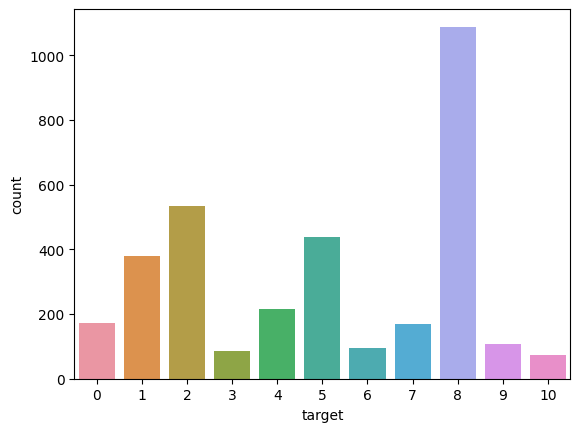

In [10]:
import seaborn as sns

# Plotting class distribution
sns.countplot(x=target)


In [11]:
'''from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np

input_shape = (6, 36)  
classes = len(np.unique(y))  


normalizer = layers.Normalization(axis=-1)  
normalizer.adapt(X_reshaped)


model = keras.Sequential()
model.add(layers.Input(shape=input_shape)) 
model.add(normalizer)  


model.add(layers.Conv1D(16, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(16, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(32, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(32, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(classes, activation='softmax'))


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
'''

"from tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.optimizers import Adam\nimport numpy as np\n\ninput_shape = (6, 36)  \nclasses = len(np.unique(y))  \n\n\nnormalizer = layers.Normalization(axis=-1)  \nnormalizer.adapt(X_reshaped)\n\n\nmodel = keras.Sequential()\nmodel.add(layers.Input(shape=input_shape)) \nmodel.add(normalizer)  \n\n\nmodel.add(layers.Conv1D(16, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(layers.Conv1D(16, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(layers.Conv1D(32, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(layers.Conv1D(32, 3, kernel_regularizer=l2(0.001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmode

In [12]:
'''
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense, Input, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

X = X_reshaped
y = y

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

fold_no = 1
for train, test in kfold.split(X, y):

    normalizer = Normalization(axis=-1)
    normalizer.adapt(X[train])

    inputs = Input(shape=(timesteps, features_per_timestep))

    x = normalizer(inputs)
    x = LSTM(8, return_sequences=True,  kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x)
    x = BatchNormalization()(x)

    x = LSTM(16, return_sequences=True, kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(16, return_sequences=True, kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(32, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(32, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(32, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(32, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_dropout=0.4)(x)  
    x = BatchNormalization()(x)

    x = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x) 
    x = BatchNormalization()(x)

    x = LSTM(128, return_sequences=False, kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x) 
    x = BatchNormalization()(x)

    x = Flatten()(x) 

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x) 

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x) 
    outputs = Dense(classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    
    print(f'Training for fold {fold_no} ...')


    history = model.fit(X[train], y[train],
                        batch_size=64,
                        epochs=100,
                        verbose=1,
                        validation_data=(X[test], y[test]),callbacks=[early_stopping, reduce_lr])


    fold_no = fold_no + 1
'''

"\nimport numpy as np\nfrom sklearn.model_selection import KFold\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import LSTM, BatchNormalization, Dense, Input, Flatten, Dropout\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.layers.experimental.preprocessing import Normalization\n\nX = X_reshaped\ny = y\n\nnum_folds = 5\nkfold = KFold(n_splits=num_folds, shuffle=True)\n\nearly_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)\nreduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)\n\nfold_no = 1\nfor train, test in kfold.split(X, y):\n\n    normalizer = Normalization(axis=-1)\n    normalizer.adapt(X[train])\n\n    inputs = Input(shape=(timesteps, features_per_timestep))\n\n    x = normalizer(inputs)\n    x = LSTM(8, return_sequences=True,  kernel_regularizer=l2(0.0001),recurrent_dropout=0.4)(x)\n    x = BatchNormalization()(

In [13]:
'''classes = len(np.unique(y))  
timesteps = 6
features_per_timestep = 36

#normalizer = Normalization(axis=-1, input_shape=(timesteps, features_per_timestep))

model = Sequential()
#model.add(normalizer)

#normalizer.adapt(X_reshaped)

model.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same', input_shape=(timesteps, features_per_timestep)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same', input_shape=(timesteps, features_per_timestep)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(layers.LSTM(16, return_sequences=True, recurrent_dropout=0.35))
model.add(layers.BatchNormalization())

model.add(Conv1D(32, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(32, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(32, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())

model.add(Conv1D(32, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
'''

"classes = len(np.unique(y))  \ntimesteps = 6\nfeatures_per_timestep = 36\n\n#normalizer = Normalization(axis=-1, input_shape=(timesteps, features_per_timestep))\n\nmodel = Sequential()\n#model.add(normalizer)\n\n#normalizer.adapt(X_reshaped)\n\nmodel.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same', input_shape=(timesteps, features_per_timestep)))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same', input_shape=(timesteps, features_per_timestep)))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv1D(16, 3, kernel_regularizer=l2(0.0001), activation='relu', padding='same'))\nmodel.add(layers.MaxPooling1D(pool_size=1))\nmodel

In [14]:
def mymainmodel():
    normalizer = Normalization(axis=-1)
    normalizer.adapt(features_reshaped)

    inputs = Input(shape=(num_timesteps, num_features_per_timestep))


    x = normalizer(inputs)
    
    x = Bidirectional(GRU(16, return_sequences=True))(x)  
    x = BatchNormalization()(x)

    x = Bidirectional(GRU(16, return_sequences=True))(x)  
    x = BatchNormalization()(x)

    x = Bidirectional(LSTM(16, return_sequences=True, kernel_regularizer=l2(0.0001), recurrent_dropout=0.2))(x)  
    x = BatchNormalization()(x)

    x = Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001), recurrent_dropout=0.2))(x)  
    x = BatchNormalization()(x)

    x = SimpleRNN(16, return_sequences=True)(x)  
    x = BatchNormalization()(x)

    x = SimpleRNN(32, return_sequences=True)(x)  
    x = BatchNormalization()(x)
    
    x = LSTM(16, return_sequences=True,  kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)

    x = LSTM(32, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_dropout=0.2)(x)  
    x = BatchNormalization()(x)

    x = LSTM(64, return_sequences=False, kernel_regularizer=l2(0.0001),recurrent_dropout=0.2)(x) 
    x = BatchNormalization()(x)

    x = Flatten()(x) 
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x) 

    outputs = Dense(11, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = mymainmodel()

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 36)]           0         
                                                                 
 normalization (Normalizati  (None, 6, 36)             73        
 on)                                                             
                                                                 
 bidirectional (Bidirection  (None, 6, 32)             5184      
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 6, 32)             128       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 6, 32)             4800      
 onal)                                                       

In [16]:
stopper = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    restore_best_weights=True
)

lr_adjuster = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=3, 
    min_lr=0.0001
)


fit_result = model.fit(
    features_reshaped, 
    target_array, 
    epochs=100, 
    batch_size=64, 
    validation_split=0.2, 
    callbacks=[stopper, lr_adjuster]
)

Epoch 1/100
42/42 [==============================] - 43s 233ms/step - loss: 2.1092 - accuracy: 0.2876 - val_loss: 2.3667 - val_accuracy: 0.3289 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 7s 159ms/step - loss: 1.8714 - accuracy: 0.3677 - val_loss: 2.3300 - val_accuracy: 0.3318 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 6s 155ms/step - loss: 1.7624 - accuracy: 0.3901 - val_loss: 2.2780 - val_accuracy: 0.3348 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 6s 154ms/step - loss: 1.6879 - accuracy: 0.4020 - val_loss: 2.1985 - val_accuracy: 0.3497 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 6s 154ms/step - loss: 1.6055 - accuracy: 0.4508 - val_loss: 2.0978 - val_accuracy: 0.3601 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 6s 154ms/step - loss: 1.5720 - accuracy: 0.4411 - val_loss: 1.9589 - val_accuracy: 0.3869 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 7s 156ms/s

# **Plots of accuracy and loss**

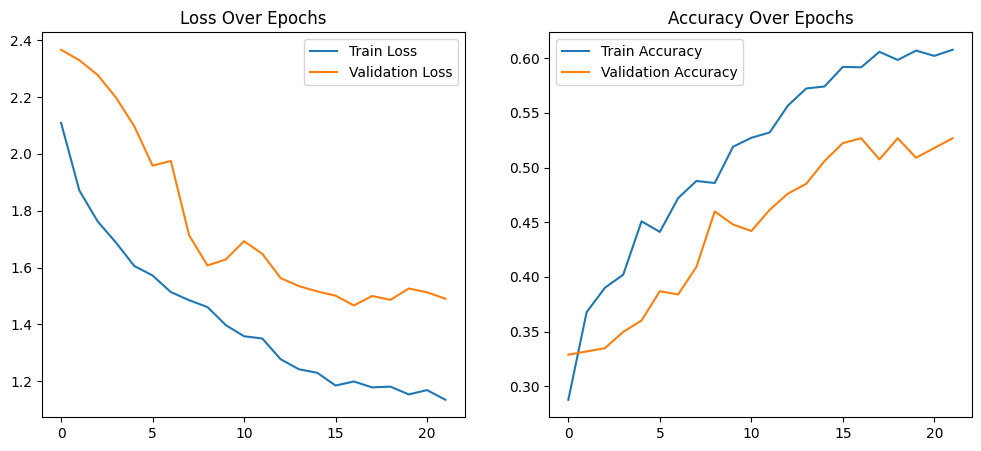

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fit_result.history['loss'], label='Train Loss')
plt.plot(fit_result.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fit_result.history['accuracy'], label='Train Accuracy')
plt.plot(fit_result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [18]:
predictions = model.predict(test_features_reshaped)
submission = pd.DataFrame(predictions, columns=['c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95'])
submission.insert(0, 'ID', test_data.index)
submission.to_csv('/kaggle/working/submission.csv', index=False)

45/45 [==============================] - 4s 15ms/step


In [19]:
data = pd.read_csv('submission.csv')
print(data)

        ID      c-15      c-16      c-42      c-52      c-62      c-65  \
0        0  0.004314  0.000550  0.525787  0.017470  0.236753  0.000763   
1        1  0.006606  0.000542  0.312591  0.048727  0.386490  0.003237   
2        2  0.027693  0.000412  0.178703  0.021989  0.043014  0.001873   
3        3  0.004987  0.000467  0.485352  0.031516  0.235344  0.000524   
4        4  0.000209  0.735717  0.000120  0.000012  0.000032  0.003410   
...    ...       ...       ...       ...       ...       ...       ...   
1434  1434  0.176819  0.004758  0.232004  0.033768  0.040899  0.032801   
1435  1435  0.000480  0.099924  0.000725  0.000148  0.000340  0.432197   
1436  1436  0.013244  0.000657  0.201808  0.038911  0.212808  0.004308   
1437  1437  0.019322  0.005302  0.077561  0.043647  0.056791  0.057384   
1438  1438  0.016748  0.000402  0.310504  0.025909  0.334917  0.001206   

          c-67      c-88      c-90      c-92      c-95  
0     0.019146  0.001279  0.144620  0.000024  0.049294

In [20]:
'''from sklearn.utils import resample

# Separate majority and minority classes
class_counts = target.value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts[majority_class]].index

# Upsample minority classes
for cls in minority_classes:
    class_samples = features_reshaped[target == cls]
    upsampled_class_samples = resample(class_samples,
                                       replace=True,     # sample with replacement
                                       n_samples=class_counts[majority_class], # to match majority class
                                       random_state=123) # reproducible results

    # Append to the features and target
    features_reshaped = np.vstack([features_reshaped, upsampled_class_samples])
    target = pd.concat([target, pd.Series([cls] * len(upsampled_class_samples))])
/'''

'from sklearn.utils import resample\n\n# Separate majority and minority classes\nclass_counts = target.value_counts()\nmajority_class = class_counts.idxmax()\nminority_classes = class_counts[class_counts < class_counts[majority_class]].index\n\n# Upsample minority classes\nfor cls in minority_classes:\n    class_samples = features_reshaped[target == cls]\n    upsampled_class_samples = resample(class_samples,\n                                       replace=True,     # sample with replacement\n                                       n_samples=class_counts[majority_class], # to match majority class\n                                       random_state=123) # reproducible results\n\n    # Append to the features and target\n    features_reshaped = np.vstack([features_reshaped, upsampled_class_samples])\n    target = pd.concat([target, pd.Series([cls] * len(upsampled_class_samples))])\n/'

In [21]:
'''from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
class_weight_dict = dict(enumerate(class_weights))
'''

"from sklearn.utils.class_weight import compute_class_weight\n\nclass_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)\nclass_weight_dict = dict(enumerate(class_weights))\n"

In [22]:
'''
# Training with class weights
model = mymainmodel()
history = model.fit(features_reshaped, target, epochs=10, batch_size=64, class_weight=class_weight_dict, callbacks=[stopper, lr_adjuster])
'''

'\n# Training with class weights\nmodel = mymainmodel()\nhistory = model.fit(features_reshaped, target, epochs=10, batch_size=64, class_weight=class_weight_dict, callbacks=[stopper, lr_adjuster])\n'